<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [71]:
# Importing pandas and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [73]:
# Check basic info
netflix_df.info()

# Descriptive statistics
netflix_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [74]:
# Fix datatypes
netflix_df = netflix_df.astype({
    'show_id': 'string',
    'type': 'category',
    'title': 'string',
    'director': 'string',
    'cast': 'string',
    'country': 'string',
    'release_year': 'int32',
    'duration': 'int32',
    'description': 'string',
    'genre': 'string'
})

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Display result
print(netflix_df.dtypes)

show_id                 string
type                  category
title                   string
director                string
cast                    string
country                 string
date_added      datetime64[ns]
release_year             int32
duration                 int32
description             string
genre                   string
dtype: object


Missing values by column:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

Missing values percentage:
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
duration        0.0
description     0.0
genre           0.0
dtype: float64


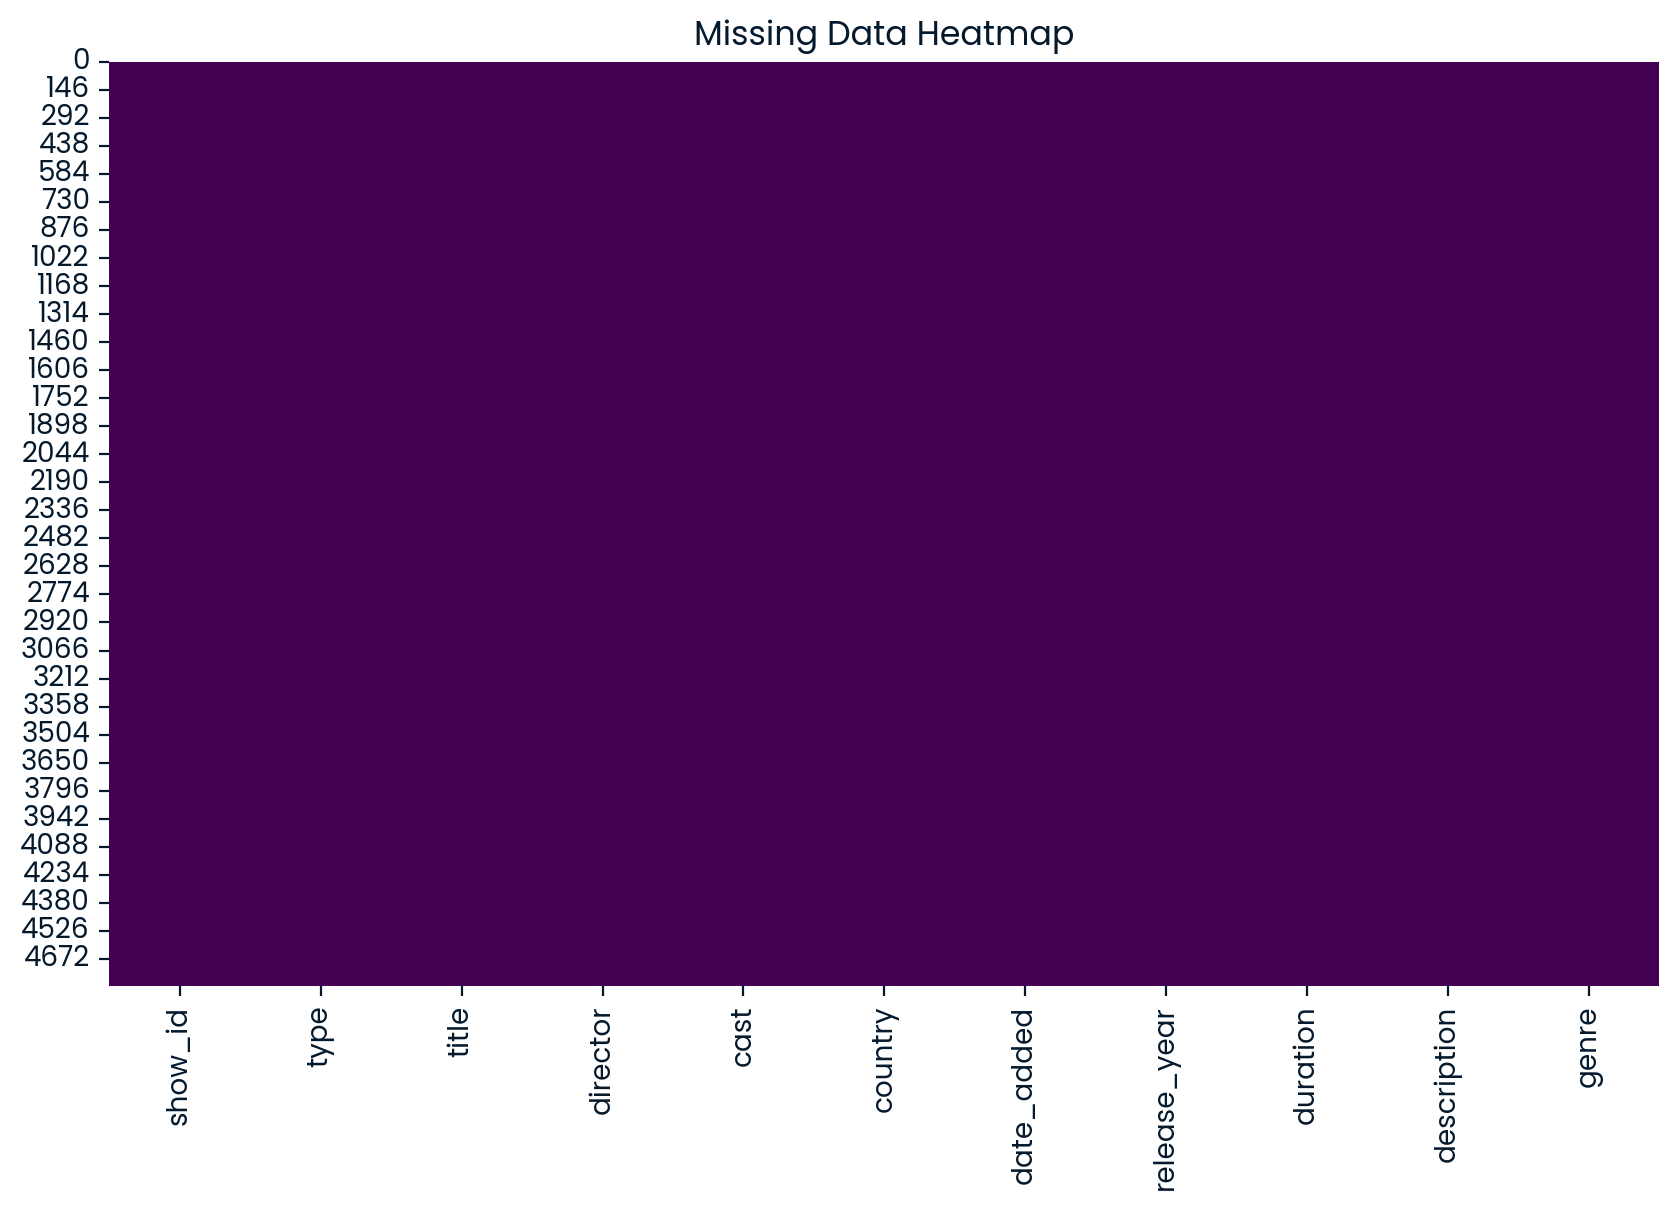

In [75]:
# Check for missing values in each column
missing_data = netflix_df.isna().sum()
print("Missing values by column:")
print(missing_data)

# Calculate the percentage of missing values in each column
missing_percentage = (missing_data / len(netflix_df)) * 100
print("\nMissing values percentage:")
print(missing_percentage)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(netflix_df.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# # Remove rows with missing values
# netflix_df_cleaned = netflix_df.dropna()

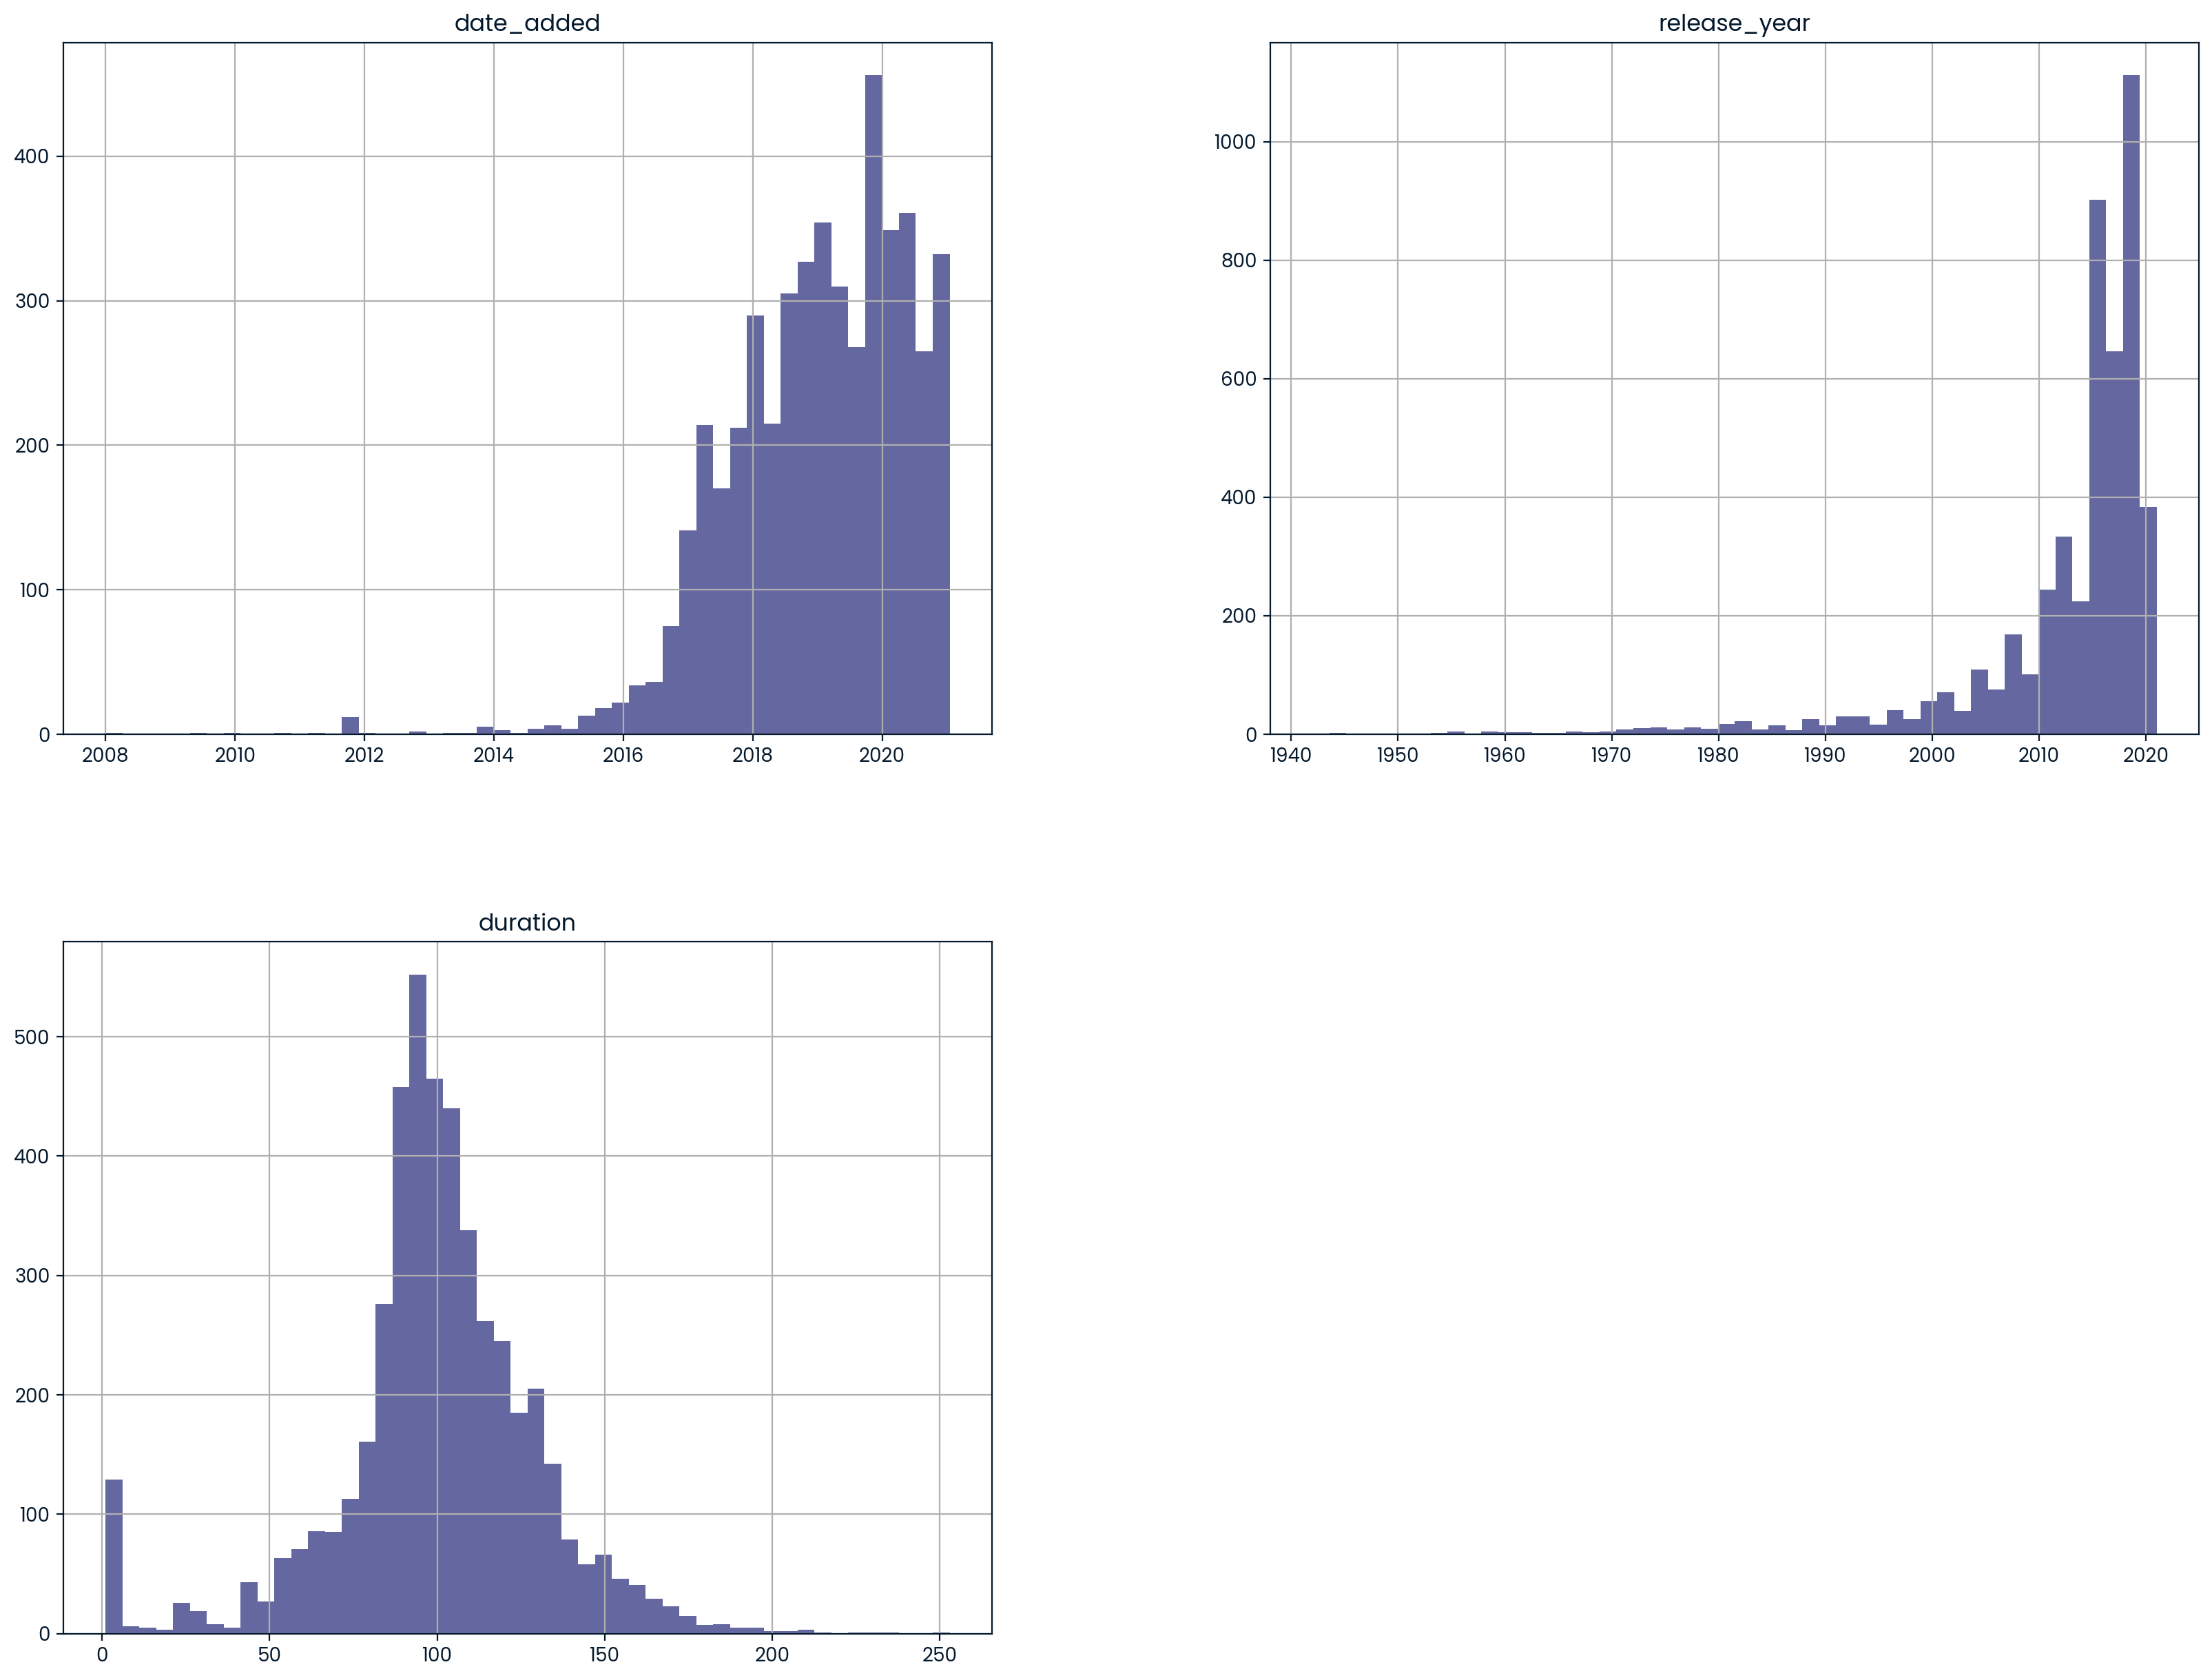

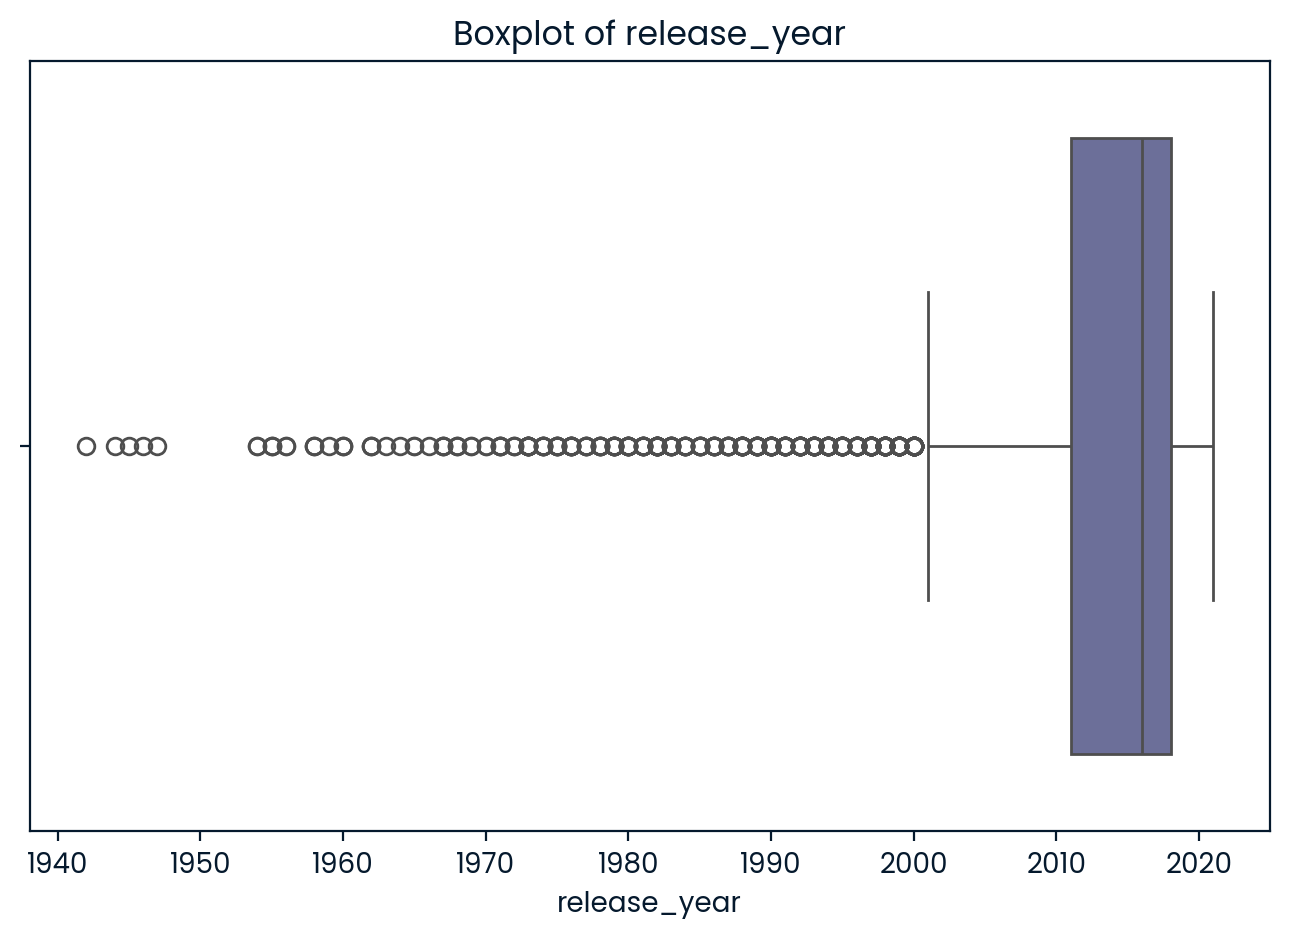

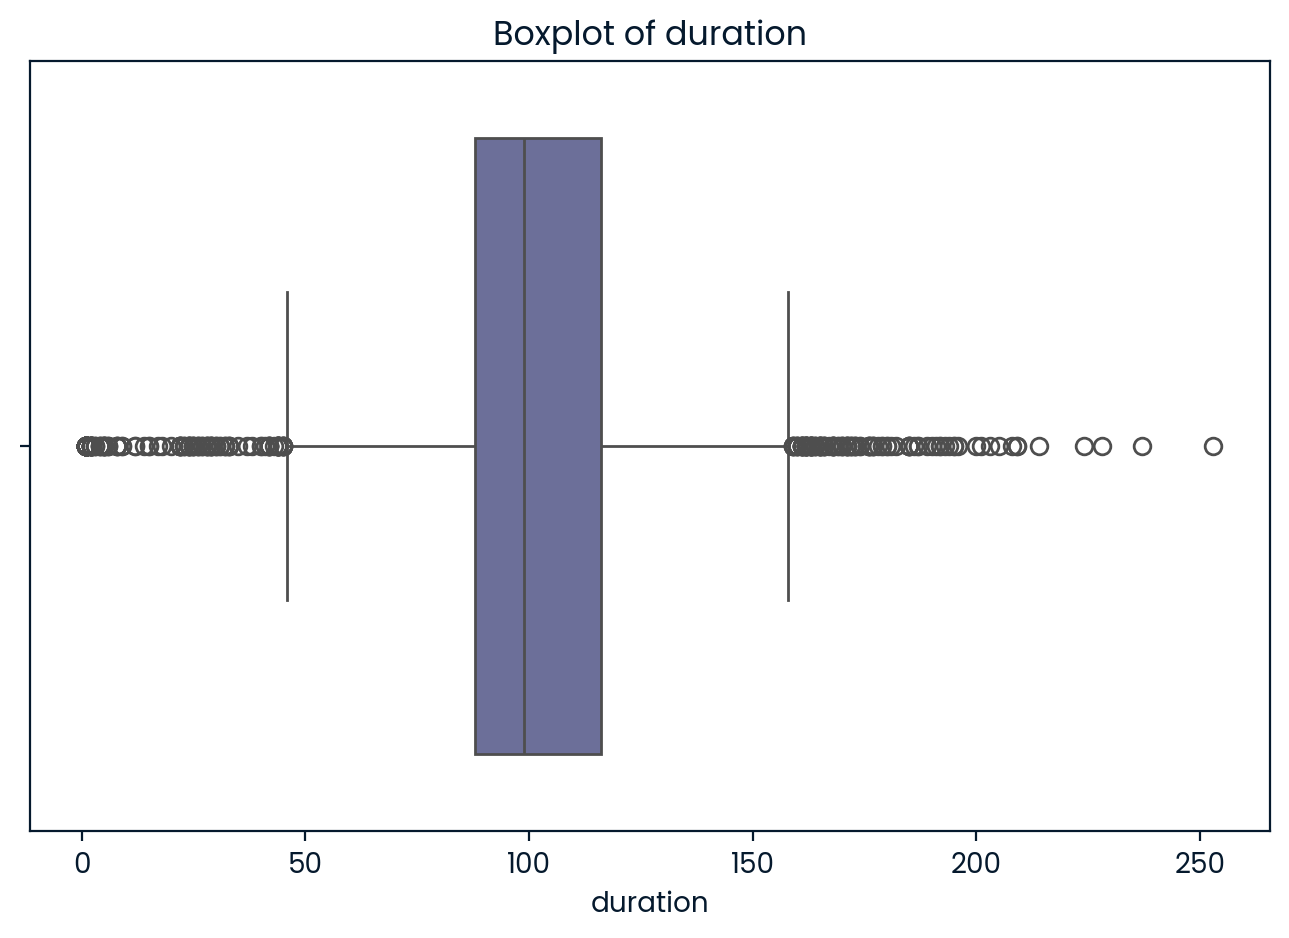

In [76]:
# Plot histograms for numerical features
netflix_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Boxplots to check for outliers
for column in netflix_df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=netflix_df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [77]:
# # Check for outliers using IQR
# def detect_outliers(df):
#     outlier_info = {}
#     for col in netflix_df.select_dtypes(include=['int64', 'int32', 'float64']):
#         Q1 = netflix_df[col].quantile(0.25)
#         Q3 = netflix_df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         outliers = netflix_df[(netflix_df[col] < lower_bound) | (netflix_df[col] > upper_bound)]
#         outlier_info[col] = {
#             'total_outliers': len(outliers),
#             'outliers_index': outliers.index.tolist()
#         }
#     return outlier_info

# # Display outlier information
# outliers = detect_outliers(netflix_df)
# for col, info in outliers.items():
#     print(f"{col}: {info['total_outliers']} outliers")
    
# # Check number of row & column (original)
# print(f"Shape before removing outliers: {netflix_df.shape}")

In [78]:
# # Function to remove outliers using IQR
# def remove_outliers(df):
#     for col in df.select_dtypes(include=['int64', 'int32', 'float64']):
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df

# # Drop outliers and update the dataframe
# netflix_df = remove_outliers(netflix_df)

# # Verify the result
# print(f"Shape after removing outliers: {netflix_df.shape}")

In [79]:
# Filter movies released in the 1990s
movies_90s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] < 2000)]

# Find the most frequent duration
mode_duration = movies_90s['duration'].mode()

# Check if mode_duration is not empty
if not mode_duration.empty:
    duration = mode_duration.iloc[0]
    # Display the result
    print(f"The most frequent movie duration in the 1990s was: {duration} minutes")
else:
    print("No movie durations found for the 1990s.")

The most frequent movie duration in the 1990s was: 94 minutes


In [80]:
# Filter movies that duration is less than 90 minutes & genre is Action
movies_90s_short_action_movie = movies_90s[(movies_90s['duration'] < 90) & (movies_90s['genre'].str.contains('Action', case=False, na=False))] 

short_movie_count = movies_90s_short_action_movie['show_id'].count()
print(short_movie_count)

7
